In [9]:
import scipy
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [10]:
from linearmodels.datasets import meps
import pandas as pd

In [11]:
data = meps.load()
data = data.dropna()

In [12]:
data.head()

,ssiratio,age,educyr,drugexp,private,female,hisp,marry,vegood,good,...,priolist,totchr,black,hi_empunion,ldrugexp,age2,linc,vgh,fph,blhisp
0,0.149877,74,16,595,1,1,0,1,0,1,...,1,0,0,1,6.388561,5476.0,4.549085,1.0,0.0,0.0
1,0.395856,73,8,1783,1,0,0,1,0,1,...,1,3,0,1,7.486053,5329.0,3.577847,1.0,0.0,0.0
2,1.000000,80,12,176,0,1,0,0,0,0,...,1,1,0,0,5.170484,6400.0,2.261763,0.0,0.0,0.0
3,0.206639,70,17,2437,1,0,0,1,0,1,...,1,5,0,1,7.798523,4900.0,3.656221,1.0,0.0,0.0
4,0.537192,91,16,330,0,0,0,1,1,0,...,1,3,0,0,5.799093,8281.0,2.166193,1.0,0.0,0.0


In [13]:
data = sm.add_constant(data)

In [14]:
y = data.income
X = data.drop('income',axis=1)

In [18]:
model_dummy = sm.OLS(y,X).fit()
RSSd = model_dummy.ssr

In [31]:
import matplotlib.pyplot as plt
import ruptures as rpt

In [53]:
path = '/home/brainiac/Vlad/Git Files/CryptoLp DataScience/DataSets/'
file = '2019_2020_t100_Close'
df_data = pd.read_csv(path+file+'.csv')
#df_data= df_data[(df_data['datetime']>="2020-01-01")]
df_data = df_data[(df_data['datetime']>="2020-02-01") & (df_data['datetime'] < "2020-03-01")]
df_data = df_data.dropna()
df_data.index = range(len(df_data))
df_data = df_data[:10000]

In [56]:
algo = rpt.Pelt(model="rbf").fit(df_data['close'].values)
result = algo.predict(pen=20)

(<Figure size 720x144 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7f77e8bb76d0>])

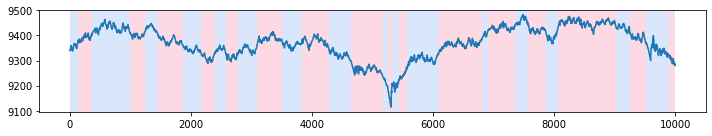

In [58]:
rpt.display(df_data['close'].values, result)
